In [2]:
import numpy as np
from numpy.core.numeric import True_
import get_cup_dataset as dt
from SVR import SVR
import kernel as krnl
import time
import matplotlib.pyplot as plt
import sys
import math
import time
import sklearn.svm as ss
from sklearn.metrics import r2_score

In [3]:
def create_kernel(x, kernel, coef, degree, gamma):
    # interface function to get the desired kernel output
    if kernel == 'linear':
        return krnl.linear(x, x)
    elif kernel == 'rbf':
        return krnl.rbf(x, x, gamma)
    elif kernel == 'poly':
        return krnl.poly(x, x, gamma, degree, coef)
    elif kernel == 'sigmoid':
        return krnl.sigmoid(x, x, gamma, coef)

# method to get the fstar of a sklearn svr model
def sklearn_fstar(x, y, sklearn_model):
    # create a correct betas array, filling with zeros where needed
    betas = np.zeros(sklearn_model.shape_fit_[0])
    dual_coef_iter = 0
    for i in range(sklearn_model.shape_fit_[0]):
        if i in sklearn_model.support_:
            betas[i] = sklearn_model.dual_coef_[0][dual_coef_iter]
            dual_coef_iter += 1
        else:
            betas[i] = 0.0
    betas = np.vstack(betas)
    
    # create kernel
    K = create_kernel(x, sklearn_model.kernel, sklearn_model.coef0, sklearn_model.degree, sklearn_model.gamma)[0]
    
    # calculate as in below formula
    fstar = (0.5 * np.dot(np.dot(np.transpose(betas), K), betas) 
            + sklearn_model.epsilon * np.sum(np.abs(betas))
            - np.transpose(y).dot(betas))
    return fstar

In [4]:
def plot_svr_predict(svr, x, y, pred, text="fig_title"):
    fig,axs = plt.subplots(2,5, figsize=(15,15))
    for i in range(x.shape[1]):
        axs[i//(x.shape[1]//2)][i%(x.shape[1]//2)].scatter(x[:,i],y,color="red",marker='x')
        axs[i//(x.shape[1]//2)][i%(x.shape[1]//2)].scatter(x[:,i],pred,color="blue",marker='.')
    fig.suptitle(text)
    plt.show()

In [5]:
data, data_out = dt._get_cup('train')
test_split = 0.2
test_len = int(len(data)*test_split)
test, test_out = data[:test_len, :], data_out[:test_len, :]
test_out1, test_out2 = test_out[:, 0], test_out[:, 1]
dev_set, dev_out = data[test_len:, :], data_out[test_len:, :]
dev_out1, dev_out2 = dev_out[:, 0], dev_out[:, 1]

max_iter = 2e5

# LINEAR

In [6]:
start = time.time()
regressor = ss.SVR(kernel = 'linear', C=1.0, epsilon=0.1, max_iter=max_iter)
regressor.fit(dev_set, dev_out1)
print(f"elapsed time {time.time() - start}")
y_pred = regressor.predict(test)
r2_score(test_out1, y_pred)

elapsed time 0.06001162528991699


0.9114966920893935

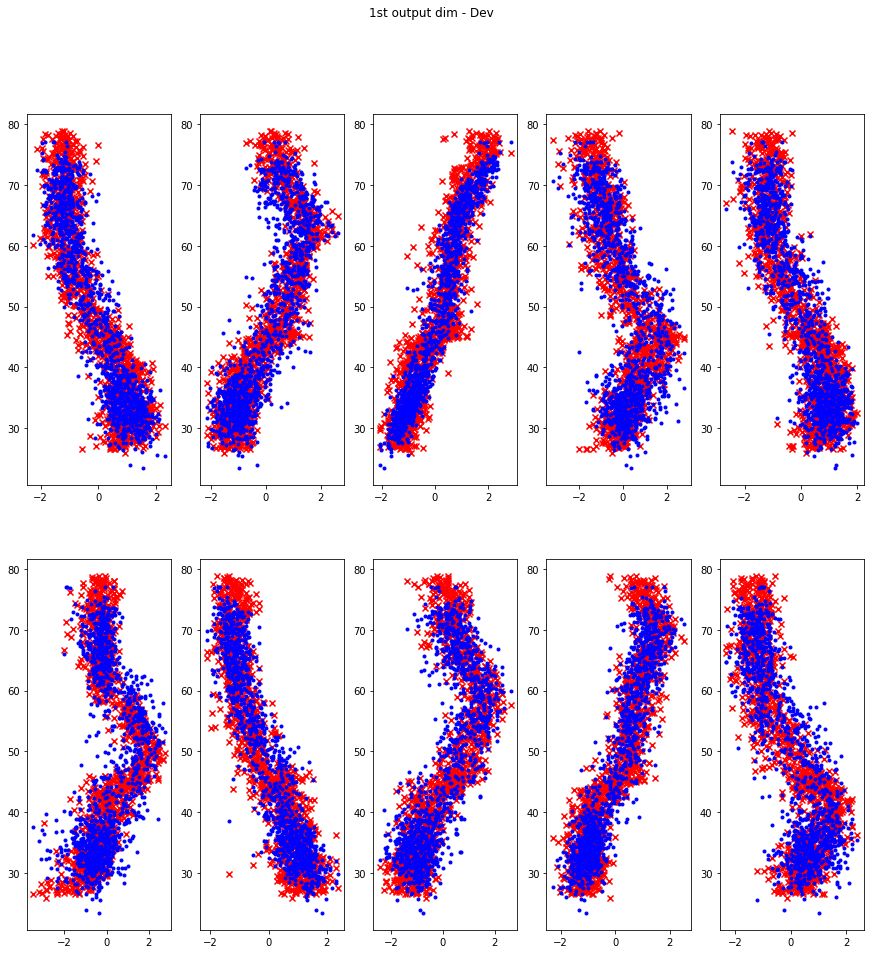

In [7]:
plot_svr_predict(None, dev_set, dev_out1, regressor.predict(dev_set), text='1st output dim - Dev')

In [8]:
sklearn_fstar(dev_set, dev_out1, regressor)

array([[-4132.78442515]])

# RBF

In [9]:
start = time.time()
regressor = ss.SVR(kernel = 'rbf', gamma=0.1, C=10.0, epsilon=0.1, max_iter=max_iter)
regressor.fit(dev_set, dev_out1)
print(f"elapsed time {time.time() - start}")
y_pred = regressor.predict(test)
r2_score(test_out1, y_pred)

elapsed time 0.08404874801635742


0.9733289969374629

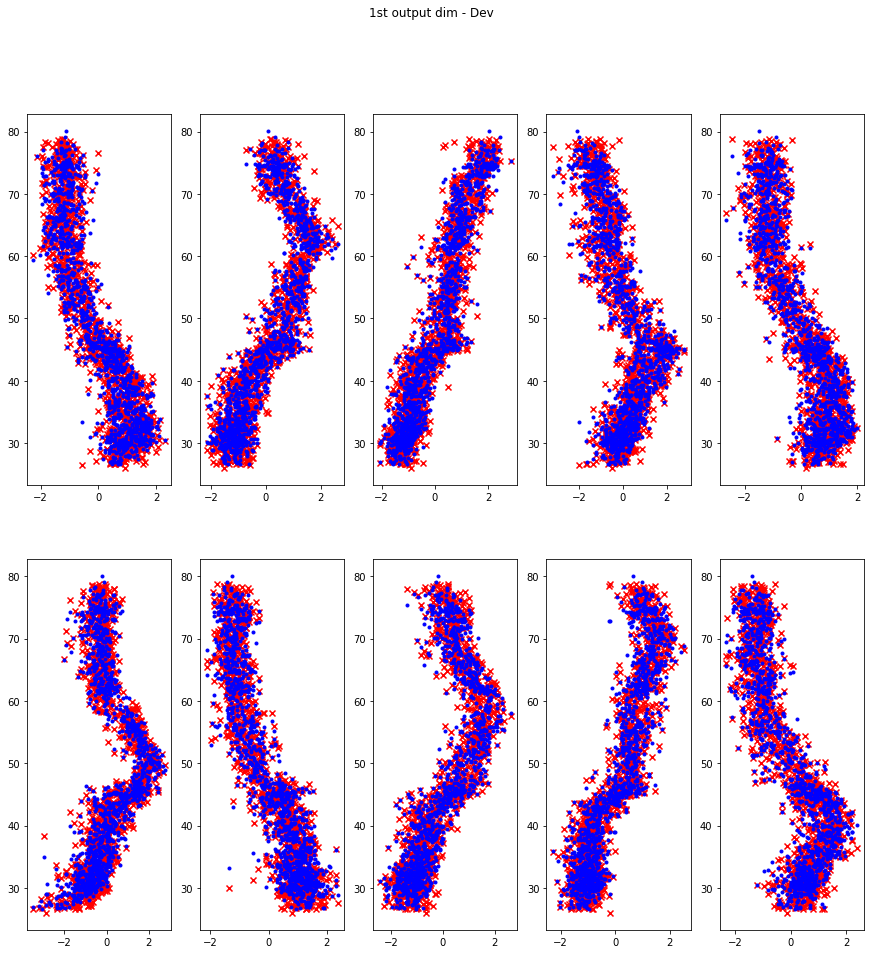

In [10]:
plot_svr_predict(None, dev_set, dev_out1, regressor.predict(dev_set), text='1st output dim - Dev')

In [11]:
regressor.get_params()

{'C': 10.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 0.1,
 'kernel': 'rbf',
 'max_iter': 200000.0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [12]:
sklearn_fstar(dev_set, dev_out1, regressor)

array([[-18917.89412188]])

# POLY

In [17]:
start = time.time()
regressor = ss.SVR(kernel = 'poly', gamma=0.075, degree=3, coef0=0.28009269588038244, max_iter=max_iter, C=10.0, epsilon=0.1)
regressor.fit(dev_set, dev_out1)
print(f"elapsed time {time.time() - start}")
y_pred = regressor.predict(test)
r2_score(test_out1, y_pred)

elapsed time 0.09099960327148438


0.9660820887682899

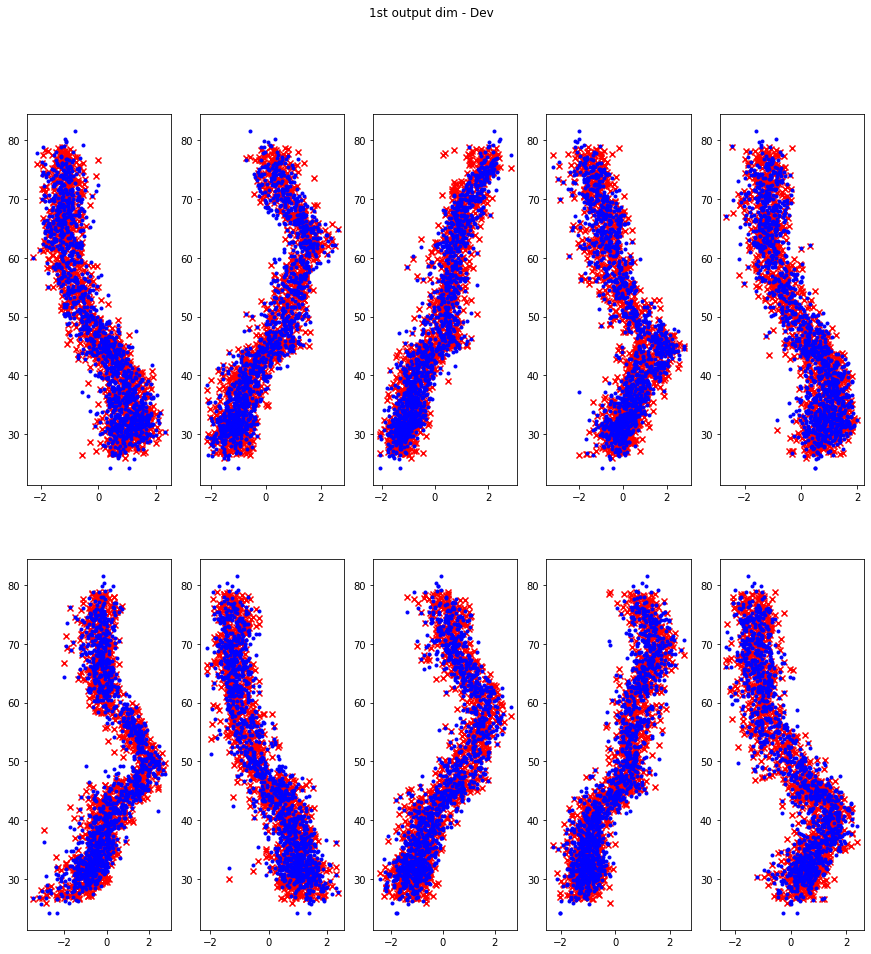

In [18]:
plot_svr_predict(None, dev_set, dev_out1, regressor.predict(dev_set), text='1st output dim - Dev')

In [19]:
regressor.get_params()

{'C': 10.0,
 'cache_size': 200,
 'coef0': 0.28009269588038244,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 0.075,
 'kernel': 'poly',
 'max_iter': 200000.0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [20]:
sklearn_fstar(dev_set, dev_out1, regressor)

array([[-22463.81189793]])